In [ ]:
import numpy as np

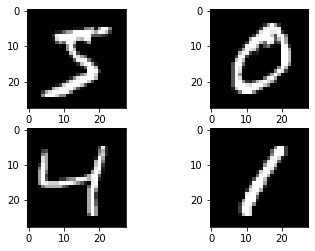

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()


In [ ]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)


In [ ]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
from keras.utils import np_utils
# one hot encode outputs
Y_test = y_test
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


Using TensorFlow backend.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
hidden_layer_nodes=50
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(hidden_layer_nodes, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(hidden_layer_nodes, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    #sgd = optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
    #model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

    return model



In [ ]:
model = baseline_model()
# Fit the model
nn_simple = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2055 - accuracy: 0.1044 - val_loss: 0.1584 - val_accuracy: 0.1028
Epoch 2/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1364 - accuracy: 0.1044 - val_loss: 0.1207 - val_accuracy: 0.1028
Epoch 3/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1125 - accuracy: 0.1044 - val_loss: 0.1063 - val_accuracy: 0.1027
Epoch 4/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1026 - accuracy: 0.1249 - val_loss: 0.0997 - val_accuracy: 0.1636
Epoch 5/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0978 - accuracy: 0.1323 - val_loss: 0.0962 - val_accuracy: 0.1139
Epoch 6/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0951 - accuracy: 0.1125 - val_loss: 0.0942 - val_accuracy: 0.1135
Epoch 7/10
60000/60000 [==============================] 

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))

10000/1 - 0s - loss: 0.0912 - accuracy: 0.1135
Baseline Error: 88.65%
Baseline Accuracy: 11.35%


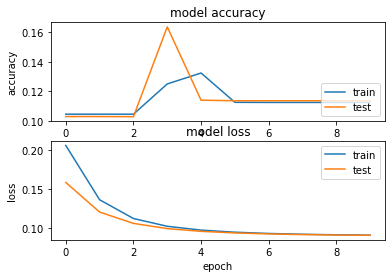

In [ ]:
plt.subplot(2,1,1)
plt.plot(nn_simple.history['accuracy'])
plt.plot(nn_simple.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(nn_simple.history['loss'])
plt.plot(nn_simple.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()



1135  classified correctly
8865  classified incorrectly


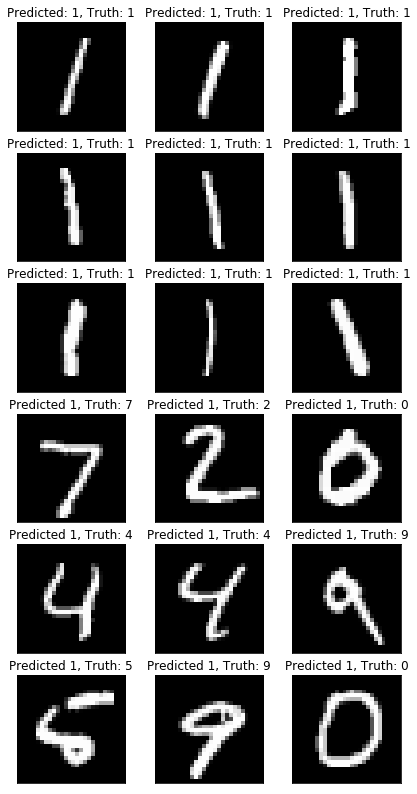

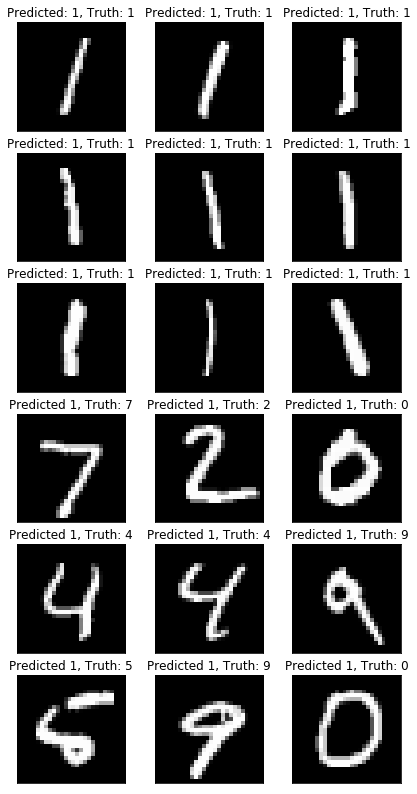

In [ ]:
import numpy as np
predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == Y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        Y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       Y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation

### Q1 Change the number of neurons in hidden layers to 75. See the accuracy and compared it to the baseline.

In [14]:
hidden_layer_nodes=75
model1 = baseline_model()
nn_nodes_75 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model1.evaluate(X_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
300/300 [==============================] - 3s 10ms/step - loss: 0.2015 - accuracy: 0.0991 - val_loss: 0.1300 - val_accuracy: 0.1032
Epoch 2/10
300/300 [==============================] - 3s 11ms/step - loss: 0.1216 - accuracy: 0.0958 - val_loss: 0.1055 - val_accuracy: 0.1032
Epoch 3/10
300/300 [==============================] - 6s 20ms/step - loss: 0.1030 - accuracy: 0.1007 - val_loss: 0.0976 - val_accuracy: 0.1156
Epoch 4/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0966 - accuracy: 0.1287 - val_loss: 0.0943 - val_accuracy: 0.1366
Epoch 5/10
300/300 [==============================] - 3s 11ms/step - loss: 0.0938 - accuracy: 0.1217 - val_loss: 0.0926 - val_accuracy: 0.1130
Epoch 6/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0923 - accuracy: 0.1154 - val_loss: 0.0916 - val_accuracy: 0.1136
Epoch 7/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0915 - accuracy: 0.1143 - val_loss: 0.0911 - val_accuracy: 0.1135
Ep

#### Ans.1

Changing the number of neurons to 75 did not change the accuracy of the model.

### Q2 Change the number of epochs to 35 and see if it has any effect (50 neurons)

In [15]:
hidden_layer_nodes=50
model2 = baseline_model()
nn_epoch_35 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=35, batch_size=200)

# Final evaluation of the model
scores = model2.evaluate(X_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/35
300/300 [==============================] - 3s 8ms/step - loss: 0.2247 - accuracy: 0.0965 - val_loss: 0.1535 - val_accuracy: 0.0693
Epoch 2/35
300/300 [==============================] - 2s 6ms/step - loss: 0.1422 - accuracy: 0.0960 - val_loss: 0.1188 - val_accuracy: 0.1135
Epoch 3/35
300/300 [==============================] - 2s 6ms/step - loss: 0.1146 - accuracy: 0.1134 - val_loss: 0.1054 - val_accuracy: 0.1135
Epoch 4/35
300/300 [==============================] - 3s 9ms/step - loss: 0.1035 - accuracy: 0.1142 - val_loss: 0.0992 - val_accuracy: 0.1135
Epoch 5/35
300/300 [==============================] - 2s 8ms/step - loss: 0.0982 - accuracy: 0.1117 - val_loss: 0.0959 - val_accuracy: 0.1135
Epoch 6/35
300/300 [==============================] - 2s 7ms/step - loss: 0.0953 - accuracy: 0.1143 - val_loss: 0.0940 - val_accuracy: 0.1135
Epoch 7/35
300/300 [==============================] - 3s 10ms/step - loss: 0.0936 - accuracy: 0.1122 - val_loss: 0.0928 - val_accuracy: 0.1135
Epoch

#### Ans.2

Increasing the epochs did not change the model's accuracy but did alter the model accuracy and model loss graphs. By increasing the epochs the model accuracy had a peak value from the test set of 13%. The accuracy levelled out at 5 epochs. this shows that increasing the epochs for a model does not neccessarily improve it

### Q3 Add one more layer to the designed neural network and see the result (This layer contains 25 nodes). Draw graphs and compare accuracies.

In [16]:
hidden_layer_nodes=50
model3 = Sequential()
model3.add(Dense(hidden_layer_nodes, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
model3.add(Dense(hidden_layer_nodes, kernel_initializer='normal', activation='sigmoid'))
model3.add(Dense(25, kernel_initializer='normal', activation='sigmoid'))
model3.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid'))
# Compile model
#sgd = optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model3.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [17]:
nn_nodes_additional_layer = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model3.evaluate(X_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
300/300 [==============================] - 2s 4ms/step - loss: 0.2204 - accuracy: 0.0973 - val_loss: 0.1764 - val_accuracy: 0.0982
Epoch 2/10
300/300 [==============================] - 2s 6ms/step - loss: 0.1663 - accuracy: 0.0997 - val_loss: 0.1420 - val_accuracy: 0.0982
Epoch 3/10
300/300 [==============================] - 3s 9ms/step - loss: 0.1364 - accuracy: 0.0955 - val_loss: 0.1228 - val_accuracy: 0.0982
Epoch 4/10
300/300 [==============================] - 2s 5ms/step - loss: 0.1196 - accuracy: 0.0987 - val_loss: 0.1116 - val_accuracy: 0.0982
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1097 - accuracy: 0.1105 - val_loss: 0.1048 - val_accuracy: 0.1135
Epoch 6/10
300/300 [==============================] - 2s 8ms/step - loss: 0.1037 - accuracy: 0.1105 - val_loss: 0.1006 - val_accuracy: 0.1135
Epoch 7/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0998 - accuracy: 0.1123 - val_loss: 0.0977 - val_accuracy: 0.1135
Epoch 

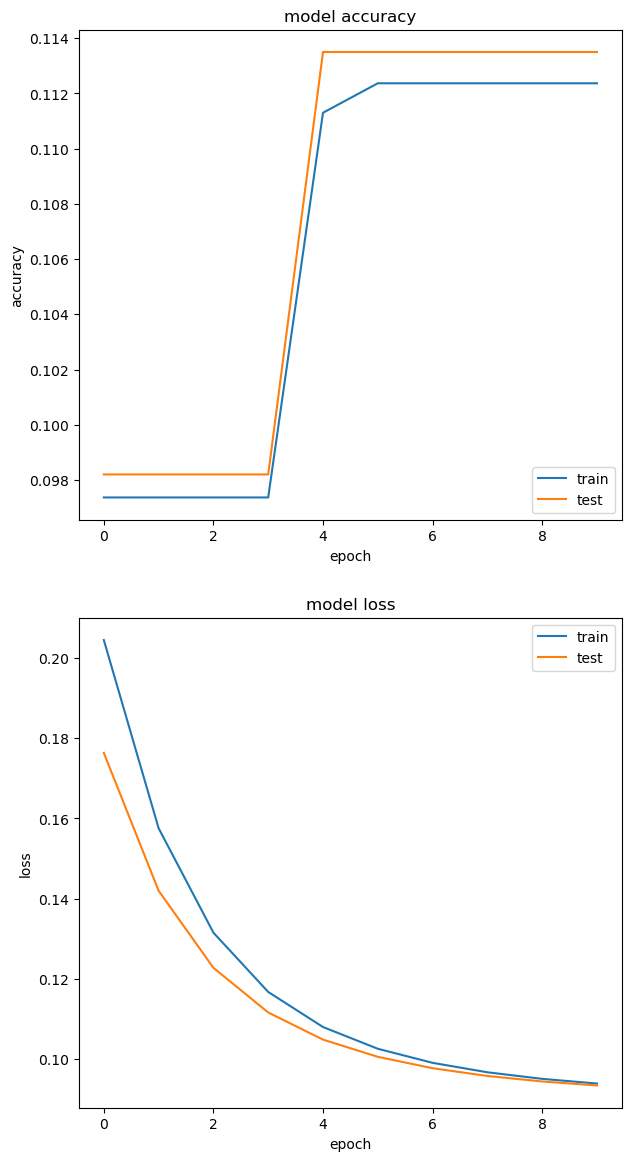

In [18]:
plt.subplot(2,1,1)
plt.plot(nn_nodes_additional_layer.history['accuracy'])
plt.plot(nn_nodes_additional_layer.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(nn_nodes_additional_layer.history['loss'])
plt.plot(nn_nodes_additional_layer.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

#### Ans.3

Adding an additional layer did not change the accuracy of the model. The shape of the graph did change. In the baseline model the model performed better on the test data than on the training data while on the extra hidden layer model the model performed slightly differentlty between datasets. The hidden layer model had a better test accuracy than the training data.

In the model loss graph we see that in the baseline the loss for both datasets merge earlier at around the fourth epoch. In the additional hidden layer loss graph we see that the datasets do not merge until the eigth epoch. This could mean that their was more loss in the additional hidden layer than in the baseline model.

Overall, increasing the number of neurons in the hidden layer, increasing the epochs or adding an additional layer does not neccessarily improve the accuracy in the models.